#লিনিয়ার রিগ্রেশান

আপনি জেনে অবাক হতে পারেন, লিনিয়ার রিগ্রেশান প্রায় ২০০ বছর আগের একটি গাণিতিক পদ্ধতি যার মাধ্যমে প্রেডিকশান করা হয়। গণিত বা পরিসংখ্যান বিষয়ের খুবই গুরুত্ববহ একটি জিনিস।

**লিনিয়ার রিগ্রেশনের নামকরণের সার্থকতা**

লিনিয়ার কথাটিতে 'লাইন' জাতীয় কিছুর গন্ধ পাওয়া যাচ্ছে? ঠিক ধরেছেন। লিনিয়ার মানেই লাইন। আর রিগ্রেশন কথাটি গতির সাথে সম্পর্কিত। একটি লাইন কেমন গতিতে সামনে বা পেছনে বাড়বে বা কমবে এটি বোঝাতে আমরা হালকা ম্যাথমেটিক্সের সাহায্য নিই। 

একটি ভেরিয়েবলের উপর আরেকটি ভেরিয়েবল কীভাবে প্রভাব ফেলছে, দুটি ভেরিয়েবলের মধ্যে লাইনের মাধ্যমে একটি সম্পর্ক করছে লিনিয়ার রিগ্রেশান। 

আমরা লাইনের ইকোয়েশন জানি: 

$y = mx+b$

এখানে x এর মান দিলে y এর মান পাওয়া যায়। x হচ্ছে ইন্ডিপেন্ডেন্ট ভেরিয়েবল। y হচ্ছে ডিপেডেন্ট ভেরিয়েবল। 

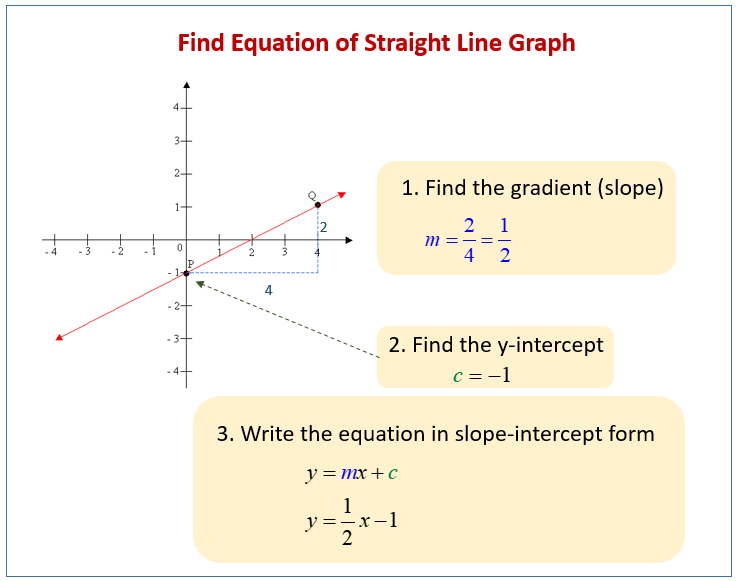

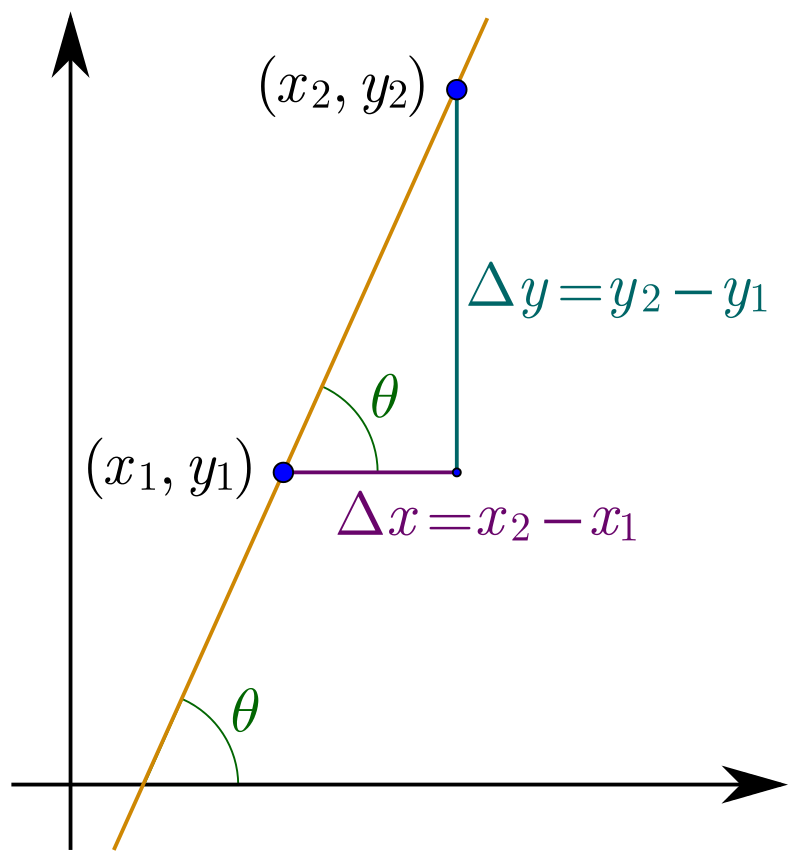


এখানে সরলরেখার সমীকরণ নিয়ে আলোচনা করা হয়েছে। দেখে নিতে পারেন-
https://www.desmos.com/calculator/8bjv1k0xqr

আরো ভালো বুঝতে: https://www.geogebra.org/m/ggj6ARbg

In [ ]:
import numpy as np # array manipulation
import pandas as pd # reading CSV file
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting
%matplotlib inline

from sklearn.model_selection import train_test_split # preprocessing
from sklearn.linear_model import LinearRegression # ML algorithm
from sklearn.metrics import r2_score # evaluation metrics

In [ ]:
# Reading CSV file
headbrain = pd.read_csv("headbrainFULL.csv")
headbrain.head(46)

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


#১। এক্সপ্লোরেটরি ডেটা এনালাইসিস

In [ ]:
headbrain.shape

(237, 4)

In [ ]:
# Heading information (outer analysis)
headbrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gender       237 non-null    int64
 1   AgeRange     237 non-null    int64
 2   HeadSize     237 non-null    int64
 3   BrainWeight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [ ]:
# Checking for null values
headbrain.isnull().any()

Gender         False
AgeRange       False
HeadSize       False
BrainWeight    False
dtype: bool

In [ ]:
# Observe unique values of data set
headbrain.nunique()

Gender           2
AgeRange         2
HeadSize       221
BrainWeight    146
dtype: int64

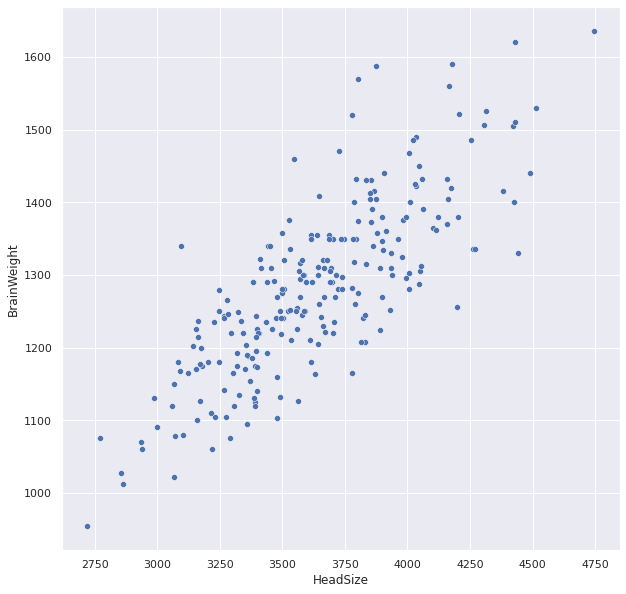

In [ ]:
# plotting data using seaborn
sns.scatterplot(y='BrainWeight', x='HeadSize', data=headbrain)

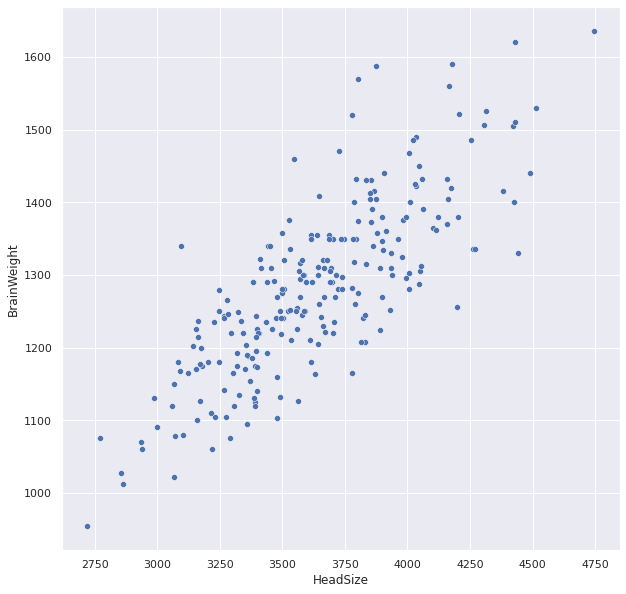

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(y='BrainWeight',x='HeadSize', data=headbrain);

In [ ]:
# Resetting seaborn effects
sns.reset_orig()

আমরা এখানে সিম্পল লিনিয়ার রিগ্রেশান এর জন্য কেবল Head Size(independent) এবং Brain Weight(dependent) বিবেচনায় রাখবো। 


In [ ]:
X = headbrain.iloc[:,2].values
y = headbrain.iloc[:,3].values

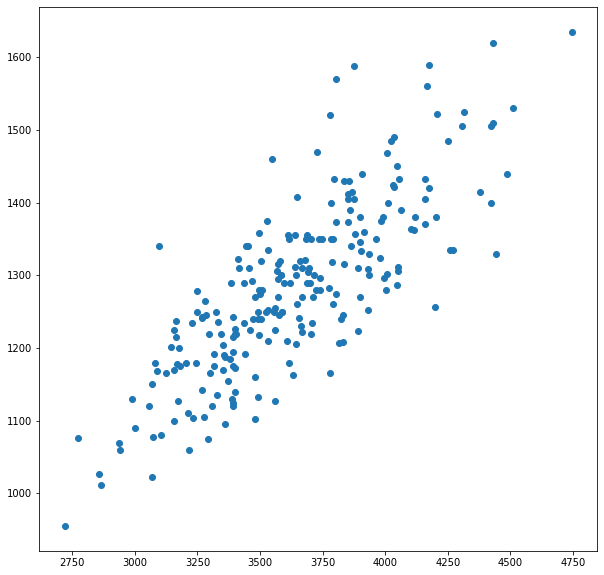

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=headbrain.HeadSize, y=headbrain.BrainWeight)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/4,random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((177,), (177,), (60,), (60,))

#২। হাতে কলমে লিনিয়ার রিগ্রেশান

এখানে আমরা হাতে কলমে লিনিয়ার রিগ্রেশান শিখবো

যে ভেরিয়েবল প্রেডিক্ট করবো সেটি Dependent variable। একে y দিয়ে বোঝানো হয়। 

Dependent variable (y) $\rightarrow$ Brain Weight. 

Independent variable (x) $\rightarrow$ Head Size.

তাহলে সূত্র দাঁড়ায় -

$y = mx+b$

m $\rightarrow$ slope / coefficient/গ্রাডিয়েন্ট

b $\rightarrow$ y-intercept/বায়াস/ কন্সট্যান্ট

আমাদের ডেটাসেটের জন্য

$BrainWeight = m * HeadSize + b$

$m = \frac{\text{Change in y axis}}{\text{Change in x axis}}$

$b = BrainWeight_i - (m * HeadSize_i)$

In [ ]:
def Linear_Regression(X,y):
  mean_x = np.mean(X)
  mean_y = np.mean(y)
  n = len(X)
  numer = 0
  denomin = 0
  for i in range(n):
    numer = numer + ((X[i] - mean_x) * (y[i] - mean_y))
    denomin = denomin + ((X[i] - mean_x) ** 2)
    m = numer / denomin
    b = mean_y - m * mean_x
  
  return(m,b)

In [ ]:
m,b = Linear_Regression(X_train, y_train)
print('Slope = ' + str(m) + '\nIntercept = ' + str(b))

Slope = -0.42089505200126165
Intercept = 2819.0162306965053


In [ ]:
y = m*4512 + b
y

1508.2756180096444

In [ ]:
def predict(X,m,b):
  pred_y=[]
  for i in range(len(X)):
    pred_y.append(b + m * X[i])
  
  return(pred_y)

In [ ]:
y_pred = predict(X_test,m,b)

In [ ]:
y_test, y_pred

(array([1280, 1321, 1425, 1250, 1350, 1408, 1440, 1210, 1422, 1405, 1362,
        1150, 1175, 1430, 1120, 1192, 1163, 1360, 1160, 1355, 1225, 1370,
        1440, 1300, 1275, 1350, 1127, 1355, 1620, 1027, 1142, 1250, 1103,
        1280, 1340, 1322, 1374, 1296, 1240, 1132, 1390, 1340, 1168, 1405,
        1485, 1255, 1140, 1202, 1080, 1022, 1220, 1230, 1245, 1405, 1195,
        1265, 1078, 1250, 1470, 1060]),
 [1306.6226748613444,
  1295.3628658530638,
  1385.4413379193095,
  1255.441724823705,
  1321.46515037226,
  1286.9180090968534,
  1502.1339040051275,
  1257.744867575399,
  1385.9531474196858,
  1339.1225781352457,
  1406.4255274347418,
  1138.4932539876986,
  1202.7253462849362,
  1334.7721973820462,
  1221.4063930486748,
  1233.6898210577083,
  1283.0794378440305,
  1355.7563868974785,
  1243.9260110652363,
  1278.2172475904547,
  1238.5520113112839,
  1418.1971459433987,
  1353.4532441457848,
  1271.0519145851852,
  1327.0950548764004,
  1312.7643888658613,
  1165.1073480072714,


এবার দেখবো আমাদের বানানো লিনিয়ার রিগ্রেশান মডেল কতটা ভালো হইছে। 
এর জন্য নানান রকম পদ্ধতি আছে- 

1. R-Square value
2. Mean square error (MSE)

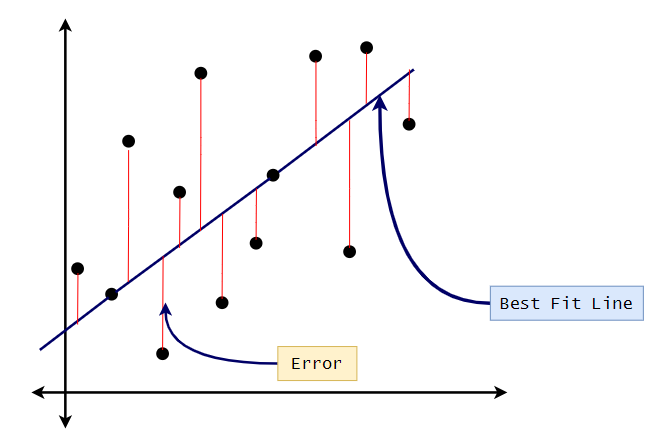

y_ob $\rightarrow$ observed data

y_pred $\rightarrow$ predicted value of y from the formula (y=mx+c)

y_hat $\rightarrow$ mean of y_ob 

$r2 \rightarrow 1 - \frac{\text{total sum of squares}}{\text{sum of squares}}$
$= 1 - \frac{\sum_{1}^{n} (y_{ob} - y_{hat})^2}{\sum_{1}^{n} (y_{ob} - y_{pred})^2 }$

In [ ]:
def r2score(y_ob, y_pred):
  yhat = np.mean(y_ob)
  ss_res = 0.0
  ss_tot = 0.0
  for i in range(len(y_ob)):
    ss_tot += (y_ob[i] - yhat)**2
    ss_res += (y_ob[i] - y_pred[i])**2
    r2 = 1 - (ss_res/ss_tot)
    
  return r2

In [ ]:
print("R-squared value: ", r2score(y_test, y_pred))

R-squared value:  0.669235821826369


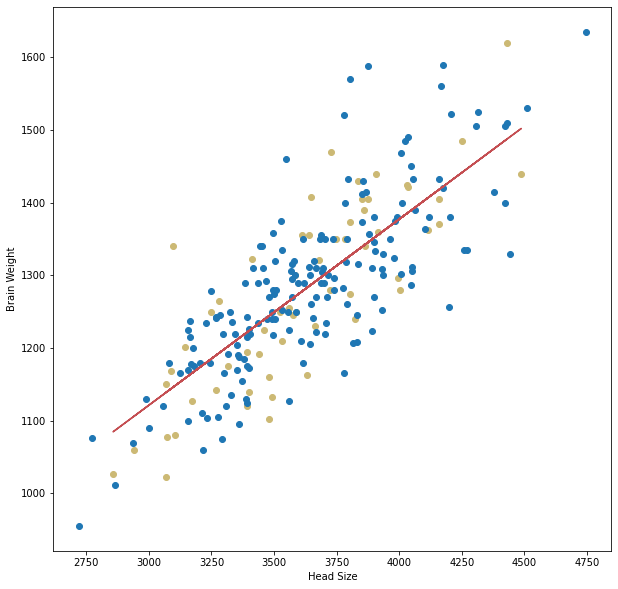

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(X_test, y_pred, c='r') # Best fit line
plt.scatter(X_test, y_test, c='y')  # Test data
plt.scatter(X_train, y_train) # train data
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.show()

#৩। ভেঙ্গে ভেঙ্গে দেখানো

**Task 1:** Do it by yourself.

We take top 10 rows to show step by step understanding of the algorithm. 

In [ ]:
Xs = np.array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982])
ys = np.array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375])
Xs, ys

(array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982]),
 array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375]))

In [ ]:
Xtrains, Xtests, ytrains, ytests = train_test_split(Xs,ys,test_size=1/5,random_state=0)
Xtrains.shape, ytrains.shape, Xtests.shape, ytests.shape

((8,), (8,), (2,), (2,))

In [ ]:
Xtrains, ytrains, Xtests, ytests

(array([4177, 3982, 3738, 3785, 3559, 3777, 4512, 3585]),
 array([1590, 1375, 1297, 1400, 1255, 1282, 1530, 1300]),
 array([4261, 3613]),
 array([1335, 1355]))

In [ ]:
newX = Xtrains[:2]
newy = ytrains[:2]
print(newX, newy)

[4177 3982] [1590 1375]


[4177 3982] [1590 1375]
Slope = 1.1025641025641026
Intercept = -3015.410256410257
Prediction:  [1335 1355] [1682.6153846153848, 968.1538461538462]


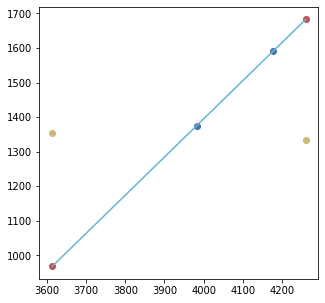

In [ ]:
newX = Xtrains[:2]
newy = ytrains[:2]
print(newX, newy)

m,b = Linear_Regression(newX, newy)
print('Slope = ' + str(m) + '\nIntercept = ' + str(b))

ypreds = predict(Xtests,m,b)
print('Prediction: ', ytests, ypreds)

plt.figure(figsize=(5,5))
plt.plot(Xtests, ypreds, c='c')
plt.scatter(newX, newy, c='b')
plt.scatter(Xtests, ytests, c='y')
plt.scatter(Xtests, ypreds, c='r')
plt.show()

In [ ]:
m,b
y = m*3600 + b
y

953.8205128205127

[4177 3982] [1590 1375]
Slope = 1.1025641025641026
Intercept = -3015.410256410257
Prediction:  [1335 1355] [1682.6153846153848, 968.1538461538462]
[4177 3982 3738 3785] [1590 1375 1297 1400]
Slope = 0.5443290636005972
Intercept = -718.5420938461411
Prediction:  [1335 1355] [1600.8440461560035, 1248.1188129428165]
[4177 3982 3738 3785 3559 3777] [1590 1375 1297 1400 1255 1282]
Slope = 0.514878976977946
Intercept = -608.7473820130604
Prediction:  [1335 1355] [1585.1519388899678, 1251.5103618082587]
[4177 3982 3738 3785 3559 3777 4512 3585] [1590 1375 1297 1400 1255 1282 1530 1300]
Slope = 0.33067770584450623
Intercept = 92.49539783102364
Prediction:  [1335 1355] [1501.5131024344646, 1287.2339490472245]


<Figure size 720x720 with 0 Axes>

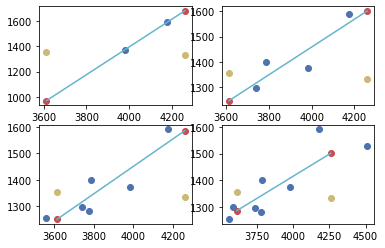

In [ ]:
newX = Xtrains[:2]
newy = ytrains[:2]
print(newX, newy)

m,b = Linear_Regression(newX, newy)
print('Slope = ' + str(m) + '\nIntercept = ' + str(b))

ypreds = predict(Xtests,m,b)
print('Prediction: ', ytests, ypreds)

plt.figure(figsize=(10,10))
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(Xtests, ypreds, c='c')
axs[0, 0].scatter(newX, newy, c='b')
axs[0, 0].scatter(Xtests, ytests, c='y')
axs[0, 0].scatter(Xtests, ypreds, c='r')


newX = Xtrains[:4]
newy = ytrains[:4]
print(newX, newy)

m,b = Linear_Regression(newX, newy)
print('Slope = ' + str(m) + '\nIntercept = ' + str(b))

ypreds = predict(Xtests,m,b)
print('Prediction: ', ytests, ypreds)

axs[0, 1].plot(Xtests, ypreds, c='c')
axs[0, 1].scatter(newX, newy, c='b')
axs[0, 1].scatter(Xtests, ytests, c='y')
axs[0, 1].scatter(Xtests, ypreds, c='r')



newX = Xtrains[:6]
newy = ytrains[:6]
print(newX, newy)

m,b = Linear_Regression(newX, newy)
print('Slope = ' + str(m) + '\nIntercept = ' + str(b))

ypreds = predict(Xtests,m,b)
print('Prediction: ', ytests, ypreds)

axs[1, 0].plot(Xtests, ypreds, c='c')
axs[1, 0].scatter(newX, newy, c='b')
axs[1, 0].scatter(Xtests, ytests, c='y')
axs[1, 0].scatter(Xtests, ypreds, c='r')



newX = Xtrains[:8]
newy = ytrains[:8]
print(newX, newy)

m,b = Linear_Regression(newX, newy)
print('Slope = ' + str(m) + '\nIntercept = ' + str(b))

ypreds = predict(Xtests,m,b)
print('Prediction: ', ytests, ypreds)

axs[1, 1].plot(Xtests, ypreds, c='c')
axs[1, 1].scatter(newX, newy, c='b')
axs[1, 1].scatter(Xtests, ytests, c='y')
axs[1, 1].scatter(Xtests, ypreds, c='r')
plt.show()

#৪। লাইব্রেরি ব্যবহার করে লিনিয়ার রিগ্রেশান

In [ ]:
X_train

array([3170, 3391, 3297, 3399, 3497, 3899, 3473, 4177, 3618, 3393, 3269,
       4270, 3415, 4036, 3558, 3156, 2937, 3962, 4208, 3777, 3302, 4747,
       3787, 3735, 3866, 3890, 3582, 3695, 4424, 3609, 4051, 4012, 3703,
       3830, 3793, 4006, 3548, 3853, 3309, 3614, 3360, 3704, 3566, 3505,
       3832, 4022, 3891, 3586, 3878, 3707, 4308, 3779, 3214, 3791, 2989,
       4442, 3666, 4261, 3669, 3903, 3381, 3804, 3354, 3443, 3436, 4057,
       4204, 3685, 3571, 3503, 3654, 3899, 3156, 3284, 3594, 4512, 3700,
       3779, 4381, 3644, 3641, 3850, 3233, 3530, 3710, 3438, 3930, 3495,
       3532, 3165, 3352, 3785, 4430, 3933, 4200, 2864, 3979, 3228, 3058,
       3689, 3318, 3277, 3993, 3937, 3876, 3814, 4166, 3329, 3738, 3399,
       3394, 4315, 3648, 4046, 3692, 3466, 3334, 3667, 4063, 3497, 3158,
       4053, 4158, 3454, 3181, 3383, 3292, 3323, 3796, 3556, 3124, 3642,
       2720, 3389, 4103, 3358, 3175, 3493, 3267, 4175, 3561, 3478, 3249,
       3394, 3203, 3835, 3344, 3499, 3451, 3218, 41

In [ ]:
# Reshape the data into 2D array (Numpy)
# ERROR: Reshape your data either using array.reshape(-1, 1) if your data has a single feature 
# or array.reshape(1, -1) if it contains a single sample.
X_train = X_train.reshape(-1,1)
X_train

array([[3170],
       [3391],
       [3297],
       [3399],
       [3497],
       [3899],
       [3473],
       [4177],
       [3618],
       [3393],
       [3269],
       [4270],
       [3415],
       [4036],
       [3558],
       [3156],
       [2937],
       [3962],
       [4208],
       [3777],
       [3302],
       [4747],
       [3787],
       [3735],
       [3866],
       [3890],
       [3582],
       [3695],
       [4424],
       [3609],
       [4051],
       [4012],
       [3703],
       [3830],
       [3793],
       [4006],
       [3548],
       [3853],
       [3309],
       [3614],
       [3360],
       [3704],
       [3566],
       [3505],
       [3832],
       [4022],
       [3891],
       [3586],
       [3878],
       [3707],
       [4308],
       [3779],
       [3214],
       [3791],
       [2989],
       [4442],
       [3666],
       [4261],
       [3669],
       [3903],
       [3381],
       [3804],
       [3354],
       [3443],
       [3436],
       [4057],
       [42

You can do reshape all X values before splitting 

`X = X.reshape(len(X),1)`


In [ ]:
# Linear regression applied
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# prediction
X_test = X_test.reshape(-1,1)
y_preds = regressor.predict(X_test)


In [ ]:
y_test, y_preds

(array([1280, 1321, 1425, 1250, 1350, 1408, 1440, 1210, 1422, 1405, 1362,
        1150, 1175, 1430, 1120, 1192, 1163, 1360, 1160, 1355, 1225, 1370,
        1440, 1300, 1275, 1350, 1127, 1355, 1620, 1027, 1142, 1250, 1103,
        1280, 1340, 1322, 1374, 1296, 1240, 1132, 1390, 1340, 1168, 1405,
        1485, 1255, 1140, 1202, 1080, 1022, 1220, 1230, 1245, 1405, 1195,
        1265, 1078, 1250, 1470, 1060]),
 array([1306.62267486, 1295.36286585, 1385.44133792, 1255.44172482,
        1321.46515037, 1286.9180091 , 1502.13390401, 1257.74486758,
        1385.95314742, 1339.12257814, 1406.42552743, 1138.49325399,
        1202.72534628, 1334.77219738, 1221.40639305, 1233.68982106,
        1283.07943784, 1355.7563869 , 1243.92601107, 1278.21724759,
        1238.55201131, 1418.19714594, 1353.45324415, 1271.05191459,
        1327.09505488, 1312.76438887, 1165.10734801, 1285.12667585,
        1487.29142849, 1084.75325645, 1189.93010878, 1272.07553359,
        1243.92601107, 1378.53190966, 1342.193

In [ ]:
print("R-squared value: ", r2_score(y_test, y_preds))

R-squared value:  0.6692358218263688


Text(0, 0.5, 'brain weight')

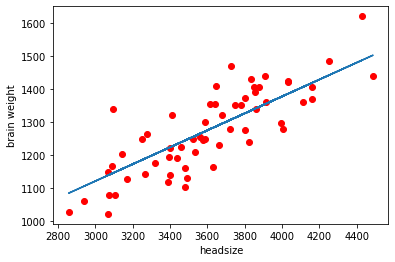

In [ ]:
#to see the relationship between the predicted brain weight values using scattered graph
plt.plot(X_test,y_pred)   
plt.scatter(X_test,y_test,c='red')
plt.xlabel('headsize')
plt.ylabel('brain weight')

#৫। এক নজরে লিনিয়ার রিগ্রেশান

###ধাপ ১ ডেটা প্রি-প্রসেসিং

* ডেটা সেট লোড 
* ডেটা ক্লিনিং
* ডেটা রিসেপিং
* ট্রেনিং এবং টেস্ট সেটা আলাদা করা

###ধাপ ২ মেশিনকে লার্ন করানো

1. এলগোরিদম এপ্লাই
2. প্রেডিক্ট করা

###ধাপ ৩ ইভালুয়েশান করা
1. প্লট করা
2. ইভালুয়েশান মেট্রিক
3. এরর কারেকশান

In simple linear regression analysis, each observation consists of two variables. These are the independent variable and the dependent variable. Multiple regression analysis looks at two or more independent variables and how they correlate to the independent variable. The equation that describes how y is related to X is called the regression model!


Now we want to look at the evidence. We want to put a line through our data that best fits our data. A regression line can show a positive linear relationship (the line looks like it’s sloping up), a negative linear relationship (the line is sloping down), or really no relationship at all (a flat line).

**রিগ্রেশানের ব্যবহার:**

প্রদত্ত ডেটার মধ্যে একটা পারস্পারিক সম্পর্ক সেট করাই রিগ্রেশান। 

একজন ছাত্র কতো ঘন্টা পড়ছে তার উপর নির্ভর করে বলা যায় সে পরীক্ষায় কত নম্বর পাবে। আবার অভিজ্ঞতার সাথে সাথে সেলারিও বাড়ে।

Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent and independent variable.

The above definition is a bookish definition, in simple terms the regression can be defined as, 

“Using the relationship between variables to find the best fit line or the regression equation that can be used to make predictions”.

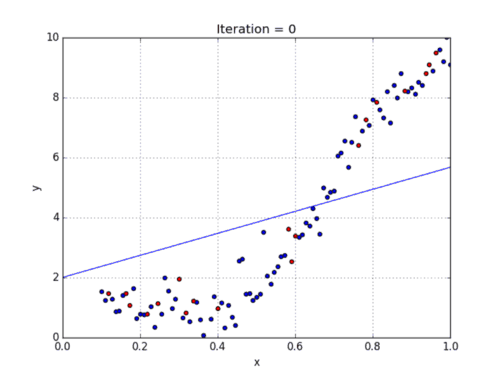

**Evaluation Metrics**
We will evaluate the performance of the model using two metrics - R-squared value and Root Mean Squared Error (RMSE).

R-squared values range from 0 to 1 and are commonly stated as percentages. It is a statistical measure that represents the proportion of the variance for a target variable that is explained by the independent variables. The other commonly used metric for regression problems is RMSE, that measures the average magnitude of the residuals or error. We will be using both these metrics to evaluate the model performance.

Ideally, lower RMSE and higher R-squared values are indicative of a good model.


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report 
from sklearn.metrics import r2_score 

# ধাপ ১ ডেটা প্রি-প্রসেসিং
headbrain = pd.read_csv("headbrainFULL.csv")
headbrain

X = headbrain.iloc[:,2].values
y = headbrain.iloc[:,3].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/4,random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

X_train = X_train.reshape(-1,1)
X_train.shape

# ধাপ ২ মেশিনকে লার্ন করানো
regressor = LinearRegression()
regressor.fit(X_train, y_train)

X_test = X_test.reshape(-1,1)
y_pred = regressor.predict(X_test)

# ধাপ ৩ ইভালুয়েশান করা
# R square error calculation

In [ ]:
from sklearn.metrics import mean_squared_error

print("mean_squared_error: ", mean_squared_error(y_test, y_preds))

mean_squared_error:  5264.955252408745


#৬। হরেক রকম লিনিয়ার রিগ্রেশান

1. সিম্পল লিনিয়ার রিগ্রেশান $\rightarrow$ relationship between just two variables (a dependent vs an independent)
2. মাল্টিপল রিগ্রেশান $\rightarrow$ relationship between two or more variables (a dependent vs 2 or more independent)


---


**Task 2:** 
মাল্টিপল রিগ্রেশান এর জন্য কোড লেখা

---



**Note:**

For reference: See all regression metric: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Data set used in this lecture:
https://raw.githubusercontent.com/mubaris/potential-enigma/master/headbrain.csv
  

In [ ]:
import sklearn
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'calinski_harabaz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'davies_bouldin_score',
 'dcg_score',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_score',
 'jaccard_similarity_score'

## New Section
---

**Task 3:**
নিচের লিঙ্কগুলো থেকে ডেটাসেট নিয়ে লিনিয়ার (Simple or multiple) রিগ্রেশান এপ্লাই করুন। সবাইকে কমপক্ষে ৩টি ডেটাসেট নিয়ে কাজ করতে হবে। অন্য সোর্স থেকে কম্ন কিছু ডেটা সেট নিয়ে কাজ করা যেতে পারে। তবে সোর্স অথেনটিক হতে হবে।  
Add code in the assignment. 

#৭। এক্সারসাইজ সেশন

* https://www.kaggle.com/harlfoxem/housesalesprediction
* https://www.kaggle.com/quantbruce/real-estate-price-prediction
* https://www.kaggle.com/smid80/weatherww2
* `datasets.load_diabetes(return_X_y=True) from sklearn`

**Easy**
* https://www.kaggle.com/tmcketterick/heights-and-weights [Easy to use]
* https://www.kaggle.com/andonians/random-linear-regression [Just very basic data set]